# **ECG**

In [45]:
import pandas as pd

import numpy as np
import wfdb
import os
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import plotly.io as pio
#pio.renderers.default = "colab"
import neurokit2 as nk
#pio.renderers.default = "browser"  # Abre o gráfico no navegador
# ou
#pio.renderers.default = "notebook"  # Usa o modo compatível com notebooks
# Configurar o tamanho da figura globalmente
plt.rcParams["figure.figsize"] = (16, 6)  # Ajuste a largura e altura aqui

# Definir o número máximo de linhas a serem exibidas
#pd.set_option('display.max_rows', None)  # Exibe todas as linhas

In [46]:
# import pandas as pd
# import glob

# # Define o padrão para os arquivos CSV

# path = r'D:\Projeto_Tese_mestrado\02_Dataset\dados_ECG\High-resolution_ECG\P0*'
# path_holter = r'D:\Projeto_Tese_mestrado\02_Dataset\dados_ECG\Holter_ECG\P0*'

# #path = r'E:/Repositorio_Git/zzz-projeto_final/dados/ca-*.csv'


# # Usando glob para pegar todos os arquivos que seguem o padrão
# arquivos = glob.glob(path)
# arquivos_path_holter = glob.glob(path_holter)
# arquivos = [os.path.splitext(arquivo)[0] for arquivo in arquivos] # tirando as a extensões

# arquivos_path_holter = [os.path.splitext(arquivos_path_holter)[0] for arquivos_path_holter in arquivos_path_holter] # tirando as a extensões

In [47]:
import pandas as pd
import glob

# Define o padrão para os arquivos CSV

path = r'D:\Projeto_Tese_mestrado\02_Dataset\dados_ECG\High-resolution_ECG\P0*'
#path_holter = r'D:\Projeto_Tese_mestrado\02_Dataset\dados_ECG\Holter_ECG\P0*'

#path = r'E:/Repositorio_Git/zzz-projeto_final/dados/ca-*.csv'


# Usando glob para pegar todos os arquivos que seguem o padrão
arquivos = glob.glob(path)
#arquivos_path_holter = glob.glob(path_holter)
arquivos = [os.path.splitext(arquivo)[0] for arquivo in arquivos] # tirando as a extensões

#arquivos_path_holter = [os.path.splitext(arquivos_path_holter)[0] for arquivos_path_holter in arquivos_path_holter] # tirando as a extensões

In [48]:
# #arquivos_path_holter

# record = wfdb.rdrecord(arquivos_path_holter[0])


# # Exibir as informações do arquivo
# print(record.__dict__)
#arquivos_path_holter

lista_sem_duplicatas = pd.Series(arquivos).unique().tolist() # removando duplicadas

In [49]:
lista_sem_duplicatas[4]

'D:\\Projeto_Tese_mestrado\\02_Dataset\\dados_ECG\\High-resolution_ECG\\P0005_H'

In [50]:
record = wfdb.rdrecord(lista_sem_duplicatas[0])




In [51]:
p_signal = record.p_signal
p_signal

array([[ 0.    ,  0.    ,  0.    ],
       [ 0.    ,  0.    ,  0.    ],
       [ 0.    ,  0.    ,  0.    ],
       ...,
       [ 0.415 ,  0.33  , -1.335 ],
       [ 0.42  ,  0.37  , -1.4125],
       [ 0.4075,  0.395 , -1.46  ]])

In [52]:
sinal_x = p_signal[:,0]
sinal_y = p_signal[:,1]
sinal_z = p_signal[:,2]

In [53]:
len(sinal_x)

1196000

In [ ]:
#ecg_cleaned = nk.ecg_clean(sinal_x, sampling_rate=record.fs, method="neurokit")

In [ ]:
ecg_cleaned 

In [ ]:
quality = nk.ecg_quality(ecg_cleaned, sampling_rate=record.fs)
nk.signal_plot([ecg_cleaned, quality], standardize=True)

In [ ]:
exg_dataframe = pd.DataFrame(ecg_cleaned, columns=['ECG_Clean'])

In [ ]:
exg_dataframe

In [ ]:
#px.line(exg_dataframe[1000:2000], x=exg_dataframe.index[0:1000], y = 'ECG_Clean')

In [48]:
sinal_x[1000:5000]

array([-0.9225, -0.9275, -0.9325, ..., -0.8325, -0.8375, -0.85  ])

In [54]:
%%time

ecg_x, dict_info_x = nk.ecg_process(sinal_x, sampling_rate= record.fs , method='neurokit') # Dividindo a tupla em DataFrame e Dicionário
#ecg_y, dict_info_y = nk.ecg_process(sinal_y, sampling_rate= record.fs , method='neurokit')
#ecg_z, dict_info_z = nk.ecg_process(sinal_z, sampling_rate= record.fs , method='neurokit')

CPU times: total: 20 s
Wall time: 21 s


In [42]:
onda = ecg_x.loc[ecg_x['ECG_R_Peaks'] == 1, 'ECG_Clean']

In [43]:
len(onda)

1125

In [65]:
from scipy import signal


# # Definição do filtro Butterworth
# def butterworth_filter(sinal, cutoff, fs, order=4, filtro_tipo='low'):
#     nyquist = 0.5 * fs  # Frequência de Nyquist
#     normal_cutoff = cutoff / nyquist  # Normalização da frequência de corte
#     b, a = signal.butter(order, normal_cutoff, btype=filtro_tipo, analog=False)
#     sinal_filtrado = signal.filtfilt(b, a, sinal)
#     return sinal_filtrado

# # Aplicando o filtro passa-baixa para remover ruído acima de 20 Hz
# sinal_filtrado = butterworth_filter(sinal_x, cutoff=50, fs=1000, order=4)
fs = 1000
# Frequência da rede elétrica (50 Hz ou 60 Hz)
powerline_freq = 50  
nyquist = 0.5 * fs  # Frequência de Nyquist
low = (powerline_freq - 1) / nyquist  # Limite inferior
high = (powerline_freq + 1) / nyquist  # Limite superior

# Criando um filtro Notch (Band-stop)
b, a = signal.butter(N=2, Wn=[low, high], btype='bandstop')

# Aplicando o filtro ao sinal
sinal_sem_ruido = signal.filtfilt(b, a, sinal_x)

In [71]:
#sinal_sem_ruido = 0

In [69]:
amostra = sinal_sem_ruido[1000:80000]

In [73]:
#x = rpeaks['ECG_R_Peaks']


import plotly.express as px
import pandas as pd

# Criando DataFrame
df = pd.DataFrame({"Valores": amostra})

#nbins=80,
# Criando o gráfico interativo
fig = px.histogram(df, x="Valores",  marginal="box", opacity=0.7,
                   title="Distribuição da onda ECG_R_Peaks",
                   color_discrete_sequence=["royalblue"], histnorm="probability density")

# Adicionando KDE
fig.update_traces(marker_line_width=1, marker_line_color="black")
fig.show()


In [84]:
amostra = ecg_x.loc[1000:5000,'ECG_Clean']


ECG_Clean = ecg_x['ECG_Clean']

In [85]:
_, rpeaks = nk.ecg_peaks(ECG_Clean, sampling_rate=1000)


In [86]:
rpeaks

{'method_peaks': 'neurokit',
 'method_fixpeaks': 'None',
 'ECG_R_Peaks': array([   1403,    1898,    2490, ..., 1192964, 1193876, 1194997]),
 'sampling_rate': 1000}

In [55]:
#signals, info = nk.ecg_peaks(sinal_x, sampling_rate=1000, correct_artifacts=True, show=True,method="neurokit")

In [56]:
#info

In [57]:
#signals

In [58]:
#signals[signals['ECG_R_Peaks'] == 1]

In [27]:
filtro = sinal_x[signals['ECG_R_Peaks'] == 1]

In [38]:
len(filtro)

1092

In [ ]:
_, waves_cwt = nk.ecg_delineate( amostra,
                                         rpeaks, 
                                         sampling_rate=1000, 
                                         method="cwt", 
                                         show=True, 
                                         show_type='all')

In [70]:
#waves_cwt['ECG_P_Peaks']
rpeaks['ECG_R_Peaks']

array([   1396,    2485,    3736, ..., 1192957, 1193902, 1194990])

In [ ]:
signal_cwt

In [10]:
ecg_x.head()

ECG_Raw  ECG_Clean   ECG_Rate  ECG_Quality  ECG_R_Peaks  ECG_P_Peaks  \
0   0.0000   0.000296  56.501625     0.490957            0            0   
1   0.0000  -0.069459  56.501625     0.490957            0            0   
2   0.0000  -0.139207  56.501625     0.490957            0            0   
3   0.0000  -0.208944  56.501625     0.490957            0            0   
4  -0.3175  -0.278692  56.501625     0.490957            0            0   

   ECG_P_Onsets  ECG_P_Offsets  ECG_Q_Peaks  ECG_R_Onsets  ECG_R_Offsets  \
0             0              0            0             0              0   
1             0              0            0             0              0   
2             0              0            0             0              0   
3             0              0            0             0              0   
4             0              0            0             0              0   

   ECG_S_Peaks  ECG_T_Peaks  ECG_T_Onsets  ECG_T_Offsets  ECG_Phase_Atrial  \
0            0            0             0              0               NaN   
1            0            0             0              0               NaN   
2            0            0             0              0               NaN   
3            0            0             0              0               NaN   
4            0            0             0              0               NaN   

   ECG_Phase_Completion_Atrial  ECG_Phase_Ventricular  \
0                          0.0                    NaN   
1                          0.0                    NaN   
2                          0.0                    NaN   
3                          0.0                    NaN   
4                          0.0                    NaN   

   ECG_Phase_Completion_Ventricular  
0                               0.0  
1                               0.0  
2                               0.0  
3                               0.0  
4                               0.0

In [33]:
onda = ecg_x.loc[ecg_x['ECG_R_Peaks'] == 1, 'ECG_Clean']

In [27]:
len(onda)

1113

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


#bins=50,

onda = rpeaks['ECG_R_Peaks']

# Criando o gráfico com Seaborn
plt.figure(figsize=(10, 6))
sns.histplot(onda, kde=True,bins=100,  color="royalblue", edgecolor="black", alpha=0.7)

# Estilizando
plt.title("Distribuição dos Dados com KDE", fontsize=14, fontweight="bold")
plt.xlabel("Valores", fontsize=12)
plt.ylabel("Densidade", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.5)

# Exibindo o gráfico
plt.show()


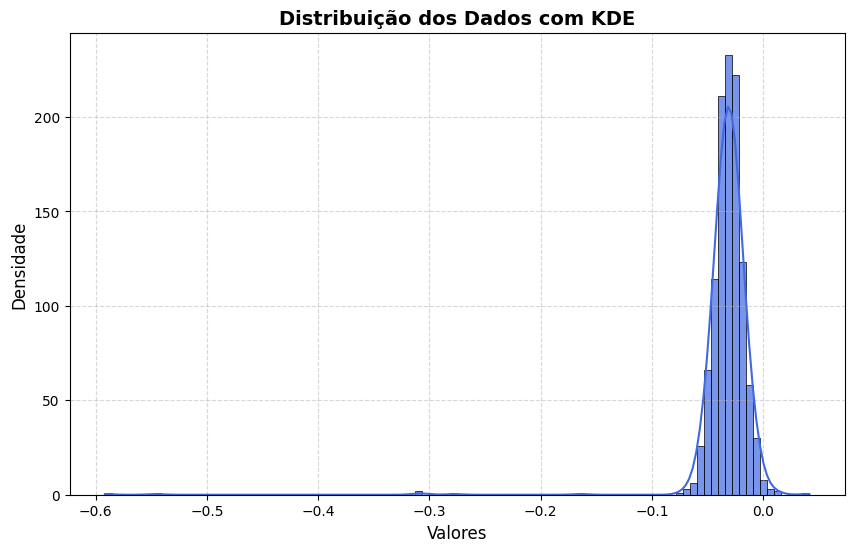

In [28]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


#bins=50,
# Gerando dados aleatórios com distribuição normal
np.random.seed(42)
dados = np.random.normal(loc=50, scale=15, size=1000)

# Criando o gráfico com Seaborn
plt.figure(figsize=(10, 6))
sns.histplot(onda, kde=True,bins=100,  color="royalblue", edgecolor="black", alpha=0.7)

# Estilizando
plt.title("Distribuição dos Dados com KDE", fontsize=14, fontweight="bold")
plt.xlabel("Valores", fontsize=12)
plt.ylabel("Densidade", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.5)

# Exibindo o gráfico
plt.show()


In [44]:
import plotly.express as px
import pandas as pd

# Criando DataFrame
df = pd.DataFrame({"Valores": onda})

#nbins=80,
# Criando o gráfico interativo
fig = px.histogram(df, x="Valores",  marginal="box", opacity=0.7,
                   title="Distribuição da onda ECG_R_Peaks usando neurokit detecção de picos - 'butterworth' ",
                   color_discrete_sequence=["royalblue"], histnorm="probability density")

# Adicionando KDE
fig.update_traces(marker_line_width=1, marker_line_color="black")
fig.show()


In [53]:
ecg_x['ECG_Clean'].head()

0    0.000296
1   -0.069459
2   -0.139207
3   -0.208944
4   -0.278692
Name: ECG_Clean, dtype: float64

In [55]:
teste = ecg_x['ECG_Clean']

In [57]:
teste_resultado, _ = nk.ecg_process(teste, sampling_rate= record.fs , method='neurokit') 

In [59]:
teste_resultado['ECG_Clean'].head()

0   -0.194482
1   -0.249462
2   -0.304140
3   -0.358217
4   -0.411392
Name: ECG_Clean, dtype: float64

In [ ]:
# somente um paciente contem 
ecg_x.shape

In [ ]:
ecg_x.columns

In [ ]:
ecg_x.head()

1. 'ECG_R_Peaks'
- Descrição: Refere-se aos picos R do ECG, que são a parte mais alta da onda QRS.
Importância: O pico R é um dos eventos mais importantes no ECG, pois indica a despolarização dos ventrículos. É amplamente usado para calcular a frequência cardíaca e identificar batimentos.
2. 'ECG_P_Peaks'
- Descrição: Refere-se aos picos P, que estão associados à despolarização atrial.
Importância: O pico P representa a contração dos átrios do coração. Ele marca o início de cada batimento cardíaco.
3. 'ECG_P_Onsets'
- Descrição: Marca o início da onda P no ECG, ou seja, o começo da despolarização atrial.
Importância: Ajuda a identificar a transição do atividade atrial para o início da contração ventricular.
4. 'ECG_P_Offsets'
- Descrição: Marca o final da onda P no ECG, ou seja, o término da despolarização atrial.
Importância: Indica quando a atividade atrial termina, permitindo a análise do ciclo atrial e ventricular.
5. 'ECG_Q_Peaks'
- Descrição: Refere-se aos picos Q, que são uma parte da onda QRS.
Importância: O pico Q representa a despolarização do septo interventricular. Ele pode ser pequeno ou até ausente em algumas pessoas.
6. 'ECG_R_Onsets'
- Descrição: Marca o início do pico R, ou seja, o início da despolarização ventricular.
Importância: Esse valor ajuda a identificar o momento exato do começo da contração ventricular.
7. 'ECG_R_Offsets'
- Descrição: Marca o fim do pico R, ou seja, quando a despolarização ventricular está terminando.
Importância: Indica o ponto de transição entre a despolarização e a repolarização ventricular.
8. 'ECG_S_Peaks'
- Descrição: Refere-se aos picos S, que estão associados ao final da onda QRS.
Importância: O pico S representa a parte final da despolarização ventricular, quando a células cardíacas estão quase totalmente despolarizadas.
9. 'ECG_T_Peaks'
- Descrição: Refere-se ao pico T, que está associado à repolarização dos ventrículos.
Importância: O pico T indica a recuperação das células ventriculares após a contração, preparando o coração para o próximo batimento.
10. 'ECG_T_Onsets'
- Descrição: Marca o início da onda T, ou seja, o início da repolarização ventricular.
Importância: Esse ponto é importante para calcular a duração da repolarização ventricular, que pode ser usado para avaliar a saúde cardíaca.
11. 'ECG_T_Offsets'
- Descrição: Marca o final da onda T, indicando quando a repolarização ventricular está concluída.
Importância: Esse ponto é útil para analisar a duração da onda T, o que pode ser importante para detectar arritmias.
12. 'ECG_Phase_Atrial'
- Descrição: Refere-se a uma fase atrial do ECG, provavelmente a fase de despolarização ou repolarização dos átrios.
Importância: Pode indicar um marcador da atividade elétrica atrial, o que é útil para análise de arritmias atriais.
13. 'ECG_Phase_Completion_Atrial'
- Descrição: Marca o término da fase atrial, provavelmente indicando quando a atividade elétrica atrial termina.
Importância: Esse evento pode ser útil para identificar a transição entre a atividade atrial e ventricular.
14. 'ECG_Phase_Ventricular'
- Descrição: Refere-se à fase ventricular do ECG, provavelmente relacionada à despolarização ou repolarização dos ventrículos.
Importância: Essencial para a análise da atividade elétrica ventricular e para detectar possíveis problemas cardíacos.
15. 'ECG_Phase_Completion_Ventricular'
- Descrição: Marca o término da fase ventricular, ou seja, o fim da atividade elétrica ventricular.
Importância: Indica a transição entre a repolarização ventricular e o início de um novo ciclo de contração atrial.


In [ ]:
import pandas as pd

# Lista de colunas que indicam eventos no ECG
colunas = ['ECG_R_Peaks', 'ECG_P_Peaks', 'ECG_P_Onsets', 'ECG_P_Offsets', 
           'ECG_Q_Peaks', 'ECG_R_Onsets', 'ECG_R_Offsets', 'ECG_S_Peaks', 
           'ECG_T_Peaks', 'ECG_T_Onsets', 'ECG_T_Offsets', 'ECG_Phase_Atrial',
           'ECG_Phase_Completion_Atrial', 'ECG_Phase_Ventricular',
           'ECG_Phase_Completion_Ventricular']


# Criar DataFrames separados com o nome da respectiva coluna
for coluna in colunas:
    globals()[coluna] = pd.DataFrame({coluna: ecg_x.loc[ecg_x[coluna] == 1, 'ECG_Clean'].values})
    
# criando uma função     
def tipo_de_ondas(ecg):
    # Criar um dicionário para armazenar os DataFrames
    tipos_ondas = {}

    for coluna in colunas:
        # Filtrar as linhas onde a coluna é igual a 1
        tipos_ondas[coluna] = ecg.loc[ecg[coluna] == 1, 'ECG_Clean']

    return tipos_ondas


In [ ]:
df_dict = {}
for coluna in colunas:
    df_dict[coluna] = ecg_x.loc[ecg_x[coluna] == 1, 'ECG_Clean'].values


In [ ]:

import matplotlib.pyplot as plt
import seaborn as sns

for x in colunas:
    lista = df_dict[x]
    
    # Criar figura e eixos para os dois gráficos
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # 1 linha, 2 colunas
    
    # Histograma com KDE
    sns.histplot(lista, kde=True, bins=50, ax=axes[0])
    axes[0].set_xlabel(x)
    axes[0].set_title(f'Histograma e KDE de {x}')
    
    # Boxplot
    sns.boxplot(x=lista, ax=axes[1])
    axes[1].set_xlabel(x)
    axes[1].set_title(f'Boxplot de {x}')
    
    # Mostrar gráfico
    plt.tight_layout()
    plt.show()


In [ ]:
ECG_R_Peaks[ECG_R_Peaks['ECG_R_Peaks']>0.7]

In [ ]:
ecg_x['ECG_Clean'].max()

In [ ]:
ECG_T_Offsets.describe()

In [ ]:
ax = sns.displot(df_dict['ECG_T_Peaks'], kde = True, bins =50)
ax.set(xlabel='ECG_T Offsets', ylabel='')

In [ ]:
ax = sns.boxplot(x= ECG_Phase_Completion_Ventricular['ECG_Phase_Completion_Ventricular'])
ax.set(xlabel='ECG_R_Offsets')
ax.set_title('Distribuição de ECG_R_Offsets')

In [ ]:
ECG_Phase_Completion_Ventricular['ECG_Phase_Completion_Ventricular']

In [ ]:
# pequena amostra de 1000
# fig = px.line(resultado_x[0:1000], x=resultado_x.index[0:1000], y = 'ECG_Clean')
# #fig.show(renderer="colab")
# fig.show()

# Clustering de Séries Temporais (não supervisionado)

Se o seu conjunto de dados de ECG não tem rótulos e você deseja agrupar os sinais com base em padrões semelhantes, você pode usar clustering, como o K-means ou o DBSCAN. Esses algoritmos podem ser aplicados diretamente em séries temporais, e você poderia extrair características importantes, como frequências, amplitude e padrões temporais para classificar as séries temporais.

Exemplo:
Transformação das Séries Temporais: Você pode usar métodos como a Transformada Rápida de Fourier (FFT) para extrair características do domínio da frequência, ou Análise de Componentes Principais (PCA) para reduzir a dimensionalidade.
Aplicação de K-means ou outro algoritmo de clustering: Após a extração das características, você pode usar K-means para agrupar os sinais de ECG em diferentes clusters, representando padrões semelhantes.

In [ ]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

# Suponha que X seja sua matriz de características extraídas de séries temporais ECG
# Pode ser a Transformada Rápida de Fourier ou outras características extraídas

ecg_clean = resultado_x['ECG_Clean']

#feactures  = resultado_x.drop(['ECG_Raw','ECG_Clean','ECG_Rate','ECG_Quality','ECG_Phase_Atrial'], axis =1)

# Reduzindo a dimensionalidade para visualização (usando PCA)
#pca = PCA(n_components=4)
#X_reduced = pca.fit_transform(feactures)  # X é um conjunto de dados com as características extraídas

ecg_clean_2d = ecg_clean.values.reshape(-1, 1)  # ou ecg_clean.to_numpy().reshape(-1, 1)

# Definir a faixa de números de clusters que você deseja testar
n_clusters_range = range(1, 11)  # Testando de 1 a 10 clusters
inertia = []

# Calcular a inércia para cada número de clusters
for n_clusters in n_clusters_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(ecg_clean_2d)  
    inertia.append(kmeans.inertia_)

# Plotando a curva de inércia
plt.plot(n_clusters_range, inertia, marker='o')
plt.xlabel('Número de Clusters')
plt.ylabel('Inércia')
plt.title('Método do Cotovelo')
plt.show()

In [ ]:
# Agora aplicando o KMeans
kmeans = KMeans(n_clusters=7, random_state=42)
clusters = kmeans.fit_predict(ecg_clean_2d)


plt.scatter(range(len(ecg_clean_2d)), ecg_clean_2d, c=clusters, cmap='viridis')
plt.show()

Vou criar um modelo de classificação que vai descobrir 3 tipos de doença do coração sendo isquemia, infarto ou necrose.

- A isquemia pode ser reconhecida pela presença de uma onda T apiculada (isquemia subendocárdica) ou invertida (isquemia subepicárdica) e simétrica, visto que a redução do fluxo sanguíneo irá lentificar a repolarização ventricular.

- corrente de lesão do infarto pode ser identificada pela presença de um infradesnivelamento (lesão subendocárdica) ou supradesnivelamento (lesão subepicárdica) do segmento ST.

- A necrose, por sua vez, por ser um evento mais tardio, é evidenciada pela presença de uma onda Q (do complexo QRS) patológica, que é caracterizada por possuir mais de 1 mm de largura e/ou ⅓ da altura do complexo QRS.

-isquemia
-corrente
-necrose

https://blog.jaleko.com.br/infarto-no-ecg-como-reconhecer/

# isquemia

Alterações na onda T

Inversão da onda T em duas derivações contíguas com R proeminente ou R/S > 1 

Onda T apiculada (isquemia subendocárdica) ou invertida (isquemia subepicárdica) e simétrica 

Diminuição da amplitude da onda T (ondas T planas) 
Aumento acentuado da amplitude da onda T (onda T hiperaguda) 

Alterações no segmento ST

Infradesnivelamento do segmento ST ≥ 0,5 mm (0,05 mV) em duas ou mais derivações contíguas 

Supradesnivelamento do segmento ST transitório 
Elevação ou depressão do segmento ST (em relação ao segmento PR) 

A isquemia afeta a fase de platô e a fase de repolarização rápida, o que causa alterações no segmento ST e na onda T. 

In [ ]:
colunas

In [ ]:
ondas_x = tipo_de_ondas(ecg_x)
ondas_y = tipo_de_ondas(ecg_y)
ondas_z = tipo_de_ondas(ecg_z)


ecgx_T_Peaks = ondas_x['ECG_T_Peaks']
ecgy_T_Peaks = ondas_y['ECG_T_Peaks']
ecgz_T_Peaks = ondas_z['ECG_T_Peaks']

df_ecgx_T_Peaks = pd.DataFrame(ecgx_T_Peaks)
df_ecgy_T_Peaks = pd.DataFrame(ecgy_T_Peaks)
df_ecgz_T_Peaks = pd.DataFrame(ecgz_T_Peaks)

In [ ]:
ondas_T_Peaks = pd.DataFrame({
    'x_T_Peaks': ecgx_T_Peaks,
    'y_T_Peaks': ecgy_T_Peaks,
    'z_T_Peaks': ecgz_T_Peaks
})

In [ ]:
ondas_T_Peaks

In [ ]:
df_ecgx_T_Peaks.columns

In [ ]:
fig = px.ecdf(df_ecgx_T_Peaks, x="Picos da onda T do ecg x")
fig.show()

In [ ]:
fig = px.ecdf(df_ecgy_T_Peaks, x="Picos da onda T do ecg y")
fig.show()

In [ ]:
fig = px.ecdf(df_ecgz_T_Peaks, x="Picos da onda T do ecg y")
fig.show()

In [ ]:

sns.boxplot(data=ondas_T_Peaks[['x_T_Peaks', 'y_T_Peaks', 'z_T_Peaks']])

# Exibir o gráfico
plt.title('Boxplot das Ondas T (x, y, z)')
plt.show()


In [ ]:
sns.boxplot(data=ondas_T_Peaks[['x_T_Peaks', 'z_T_Peaks']])

# Exibir o gráfico
plt.title('Boxplot das Ondas T (x, z)')
plt.show()

## Irei testar Redes neurais com valores binarios do Neurokit 

In [3]:
link_csv = r'D:\Projeto_Tese_mestrado\02_Dataset\dados_csv_info_definitions\ubject-info_limpo.csv'

dados = pd.read_csv(link_csv)

In [4]:
dados.head()

Patient ID  Follow-up period from enrollment (days)  days_4years  \
0      P0001                                     2065         1460   
1      P0002                                     2045         1460   
2      P0003                                     2044         1460   
3      P0004                                     2044         1460   
4      P0005                                     2043         1460   

   Exit of the study  Cause of death  SCD_4years SinusRhythm  \
0                0.0               0                       0   
1                0.0               0                       0   
2                0.0               0                       0   
3                0.0               0                       0   
4                0.0               0                       0   

   HF_4years SinusRhythm  Age  Gender (male=1)  Weight (kg)  ...  \
0                      0   58                1           83  ...   
1                      0   58                1           74  ...   
2                      0   69                1           83  ...   
3                      0   56                0           84  ...   
4                      0   70                1           97  ...   

   Angiotensin-II receptor blocker (yes=1)  \
0                                        0   
1                                        1   
2                                        1   
3                                        1   
4                                        0   

   Anticoagulants/antitrombotics  (yes=1)  Betablockers (yes=1)  \
0                                       1                     1   
1                                       1                     1   
2                                       1                     1   
3                                       1                     1   
4                                       1                     1   

   Digoxin (yes=1)  Loop diuretics (yes=1)  Spironolactone (yes=1)  \
0                1                       1                       0   
1                0                       0                       0   
2                1                       1                       0   
3                0                       1                       1   
4                0                       1                       0   

   Statins (yes=1)  Hidralazina (yes=1)  ACE inhibitor (yes=1)  \
0                0                    0                      1   
1                1                    0                      0   
2                0                    0                      0   
3                0                    0                      0   
4                1                    0                      1   

   Nitrovasodilator (yes=1)  
0                         0  
1                         0  
2                         0  
3                         0  
4                         1  

[5 rows x 105 columns]

In [5]:
# Contagem de classes no conjunto de dados
class_counts = dados['Cause of death'].value_counts()


# Contagem de classes no conjunto de dados
for class_label, count in class_counts.items():
    print(f'Classe {class_label}: {count} -> {count/dados.shape[0]*100:.2f}%')



Classe 0: 726 -> 73.19%
Classe 6: 100 -> 10.08%
Classe 3: 94 -> 9.48%
Classe 1: 61 -> 6.15%
Classe 7: 11 -> 1.11%


In [6]:
print(f'Quantidade de colunas: {dados.shape[1]}')
print(f'Quantidade de linhas: {dados.shape[0]}')

Quantidade de colunas: 105
Quantidade de linhas: 992


In [7]:
pd.unique(dados['Exit of the study'])

array([0., 3., 1., 2.])

In [8]:
#arquivos_path_holter

lista_sem_duplicatas = pd.Series(arquivos).unique().tolist() # removando duplicadas

In [9]:
len(lista_sem_duplicatas)

687

In [10]:
# Criando um DataFrame dos endereços
df_enderecos = pd.DataFrame({
    "Endereço": lista_sem_duplicatas
})

# Extraindo o Patient ID do final do endereço
df_enderecos["Patient ID"] = df_enderecos["Endereço"].apply(lambda x: x.split("\\")[-1])


# Removendo o sufixo '_H' da coluna 'Patient ID'
df_enderecos['Patient ID'] = df_enderecos['Patient ID'].str.replace('_H', '', regex=False)

# Aqui contem dados de duas colunas a primeira coluna vou usar como chave id para conectar os pacientes de cada scg e a segunda o tipo de morte.
novos_dados = dados[['Patient ID','Cause of death']]

# Fazendo a fusão (merge) dos DataFrames com base no "Patient ID"
df_final = df_enderecos.merge(novos_dados, on="Patient ID", how="left")
print(f'Sem o filtro de tipo de mortes {df_final.shape}')

df_final = df_final[~df_final['Cause of death'].isin([1])] # tirando valores que tem 1 pois significa mortes não identificada ou seja ruídos,

print(f'Com o filtro de tipo de mortes {df_final.shape}')

# Contagem de classes no conjunto de dados
class_counts = df_final['Cause of death'].value_counts()


# Contagem de classes no conjunto de dados
for class_label, count in class_counts.items():
    print(f'Classe {class_label}: {count} -> {count/df_final.shape[0]*100:.2f}%')
    
    
# Resetando o índice para garantir que o loop use os índices corretos
df_final.reset_index(drop=True, inplace=True)

Sem o filtro de tipo de mortes (687, 3)
Com o filtro de tipo de mortes (636, 3)
Classe 0: 484 -> 76.10%
Classe 6: 74 -> 11.64%
Classe 3: 70 -> 11.01%
Classe 7: 8 -> 1.26%


In [ ]:
# # Lista para armazenar informações de cada paciente
# dados_pacientes = []

# # Loop para processar cada arquivo e pegar o tamanho do sinal
# for idx, arquivo in enumerate(arquivos):
#     try:
#         # Lendo o arquivo do ECG
#         record = wfdb.rdrecord(arquivo)
#         p_signal = record.p_signal
#         sinal_x = p_signal[:, 0]
        
#         # Armazenando as informações no dicionário
#         dados_pacientes.append({
#             "Paciente": arquivo.split("\\")[-1],  # Extrair o nome do paciente
#             "Quantidade de amostras": len(sinal_x)
#         })

#     except Exception as e:
#         print(f"Erro ao processar {arquivo}: {e}")

# # Convertendo a lista para um DataFrame
# df_pacientes = pd.DataFrame(dados_pacientes)

# # Exibindo as primeiras linhas do DataFrame
# print(df_pacientes)

# df_pacientes['Quantidade de amostras'].unique()

In [ ]:
# hrv_time = nk.hrv_time(peaks, sampling_rate=100, show=True)
# hrv_time

## Cálculos para diferentes durações de sinal ECG

### 1. Para 5 minutos de sinal:
1. **Número de segundos em 5 minutos**:  
   5 minutos = 5 * 60 = 300 segundos.

2. **Número de amostras em 5 minutos**:  
   Como há 1.000 amostras por segundo, em 300 segundos teremos:
   \[
   \text{Amostras} = 1.000 \times 300 = 300.000 \, \text{amostras}.
   \]

Portanto, **5 minutos de sinal** corresponderiam a **300.000 amostras**.

---

### 2. Para 10 minutos de sinal:
1. **Número de segundos em 10 minutos**:  
   10 minutos = 10 * 60 = 600 segundos.

2. **Número de amostras em 10 minutos**:  
   Como há 1.000 amostras por segundo, em 600 segundos teremos:
   \[
   \text{Amostras} = 1.000 \times 600 = 600.000 \, \text{amostras}.
   \]

Portanto, **10 minutos de sinal** corresponderiam a **600.000 amostras**.

---

### 3. Para 15 minutos de sinal:
1. **Número de segundos em 15 minutos**:  
   15 minutos = 15 * 60 = 900 segundos.

2. **Número de amostras em 15 minutos**:  
   Como há 1.000 amostras por segundo, em 900 segundos teremos:
   \[
   \text{Amostras} = 1.000 \times 900 = 900.000 \, \text{amostras}.
   \]

Portanto, **15 minutos de sinal** corresponderiam a **900.000 amostras**.

---

### 4. Para 20 minutos de sinal:
1. **Número de segundos em 20 minutos**:  
   20 minutos = 20 * 60 = 1.200 segundos.

2. **Número de amostras em 20 minutos**:  
   Como há 1.000 amostras por segundo, em 1.200 segundos teremos:
   \[
   \text{Amostras} = 1.000 \times 1.200 = 1.200.000 \, \text{amostras}.
   \]

Portanto, **20 minutos de sinal** corresponderiam a **1.200.000 amostras**.

---
Vou desconsiderar por enquanto primeiro vou usar o ECG com resolução otima, ela tem 20 minutos no total
### 5. Para 25 minutos de sinal:
1. **Número de segundos em 25 minutos**:  
   25 minutos = 25 * 60 = 1.500 segundos.

2. **Número de amostras em 25 minutos**:  
   Como há 1.000 amostras por segundo, em 1.500 segundos teremos:
   \[
   \text{Amostras} = 1.000 \times 1.500 = 1.500.000 \, \text{amostras}.
   \]

Portanto, **25 minutos de sinal** corresponderiam a **1.500.000 amostras**.


In [14]:
# import pandas as pd
# import numpy as np
# import time
# import wfdb
# import neurokit2 as nk

# inicio_geral = time.time()

# # Resetando o índice para garantir que o loop use os índices corretos
# df_final.reset_index(drop=True, inplace=True)

# inicio_amostra = 100  # Começar a partir da amostra 100 (reduzir ruídos iniciais)
# duracao_em_amostras = 300000  # 5 minutos em amostras

# # Lista de colunas que indicam eventos no ECG
# colunas = [
#     'ECG_R_Peaks', 'ECG_P_Peaks', 'ECG_P_Onsets', 'ECG_P_Offsets', 
#     'ECG_Q_Peaks', 'ECG_R_Onsets', 'ECG_R_Offsets', 'ECG_S_Peaks', 
#     'ECG_T_Peaks', 'ECG_T_Onsets', 'ECG_T_Offsets', 'ECG_Phase_Atrial',
#     'ECG_Phase_Completion_Atrial', 'ECG_Phase_Ventricular',
#     'ECG_Phase_Completion_Ventricular'
# ]

# # Função para calcular estatísticas
# def calcular_estatisticas(ondas):
#     if ondas.empty:  # Se não houver valores, retorna estatísticas zeradas
#         return {stat: 0 for stat in ["mean", "std", "max", "min", "25%", "50%", "75%"]}
    
#     estatisticas = {
#         "mean": ondas.mean(),
#         "std": ondas.std(),
#         "max": ondas.max(),
#         "min": ondas.min(),
#         "25%": ondas.quantile(0.25),
#         "50%": ondas.quantile(0.50),
#         "75%": ondas.quantile(0.75)
#     }
    
#     return estatisticas

# # Função para processar os dados
# def processar_ecg_com_estatisticas(df_final):
#     dados_processados = []

#     # Iniciando a contagem de tempo
#     inicio = time.time()

#     for idx, endereco in enumerate(df_final["Endereço"]):
#         try:
#             inicio_paciente = time.time()
#             print(f"✅ Iniciando processamento do paciente {idx+1}/{len(df_final)}...")

#             # Lendo o sinal do ECG
#             print(f"   Lendo arquivo {endereco}...")
#             record = wfdb.rdrecord(endereco)
#             sinal_x = record.p_signal[:, 0]

#             # Filtrando o sinal ECG para considerar apenas os dados relevantes
#             sinal_filtrado = sinal_x[inicio_amostra: inicio_amostra + duracao_em_amostras]

#             # Processando o ECG com o Neurokit (pegando só as colunas necessárias)
#             print(f"   Processando ECG com Neurokit...")
#             ecg_x, _ = nk.ecg_process(sinal_filtrado, sampling_rate=record.fs, method='neurokit')

#             # Criando um dicionário para armazenar as estatísticas das ondas
#             estatisticas_paciente = {}

#             for coluna in colunas:
#                 if coluna not in ecg_x.columns:
#                     print(f"⚠️ Coluna {coluna} não encontrada. Pulando...")
#                     continue  # Pula essa etapa se a coluna não existir

#                 print(f"   Processando coluna: {coluna}...")
#                 ondas = ecg_x.loc[ecg_x[coluna] == 1, 'ECG_Clean']

#                 # Calculando as estatísticas para essa onda
#                 estatisticas = calcular_estatisticas(ondas)
#                 for stat, valor in estatisticas.items():
#                     estatisticas_paciente[f"{coluna}_{stat}"] = valor

#             # Adicionando o target do paciente
#             estatisticas_paciente["target"] = df_final.loc[idx, "Cause of death"]

#             # Adicionando os resultados à lista
#             dados_processados.append(estatisticas_paciente)

#             # Liberando a memória de ecg_x após o uso
#             del ecg_x

#             print(f"✅ Paciente {idx+1}/{len(df_final)} processado: {endereco}")

#         except Exception as e:
#             print(f"❌ Erro ao processar {endereco}: {e}")
#             continue  # Continua com o próximo paciente, sem interromper o código

#     # Convertendo a lista de dicionários em um DataFrame final
#     df_estatisticas_final = pd.DataFrame(dados_processados)

#     # Substituindo todos os NaN por zero (caso ainda haja algum)
#     df_estatisticas_final.fillna(0, inplace=True)

#     # Finalizando a contagem de tempo
#     fim = time.time()
#     tempo_execucao = fim - inicio

#     # Exibindo o tempo total de execução
#     print(f"Tempo total de execução: {tempo_execucao:.2f} segundos")

#     return df_estatisticas_final

# # Exemplo de uso
# df_estatisticas = processar_ecg_com_estatisticas(df_final)

# # Exibindo as primeiras linhas do DataFrame final
# #print(df_estatisticas.head())


# # salvando o dataframe
# df_estatisticas.to_csv("D:/Projeto_Tese_mestrado/02_Dataset/dados_ECG/dados_ecg.csv", index=False)


In [15]:
# salvando o dataframe
#df_ecg_final.to_csv("dados_ecg.csv", index=False)


In [16]:
#df_estatisticas.shape

In [17]:
#df_estatisticas.head()

In [25]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np


def tratamento_dados(dados, filtro):
    """
    Função para tratar os dados, filtrando colunas específicas e realizando pré-processamento.

    Parâmetros:
    - dados (DataFrame): O dataset a ser tratado.
    - filtro (str): Palavra-chave para selecionar as colunas (default: "ECG_R_Peaks").

    Retorna:
    - X_train_scaled, X_test_scaled, y_train, y_test
    """

    # Filtrar colunas que contêm a palavra-chave no nome
    colunas_filtradas = dados.filter(like=filtro).columns
    X = dados[colunas_filtradas].values  # Apenas colunas filtradas

    # Garantir que o target seja separado corretamente
    y = dados['target'].values  

    # Transformar os rótulos usando LabelEncoder
    label_encoder = LabelEncoder()
    y_encoded = label_encoder.fit_transform(y)

    # Verificar o mapeamento dos rótulos
    print("Rótulos originais:", np.unique(y))
    print("Rótulos transformados:", np.unique(y_encoded))

    # Dividir em treino e teste (80% treino, 20% teste)
    X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, stratify=y_encoded, random_state=42)

    # Normalizar os dados
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Converter o target para one-hot encoding se for multiclasse
    num_classes = len(np.unique(y_encoded))
    y_train = to_categorical(y_train, num_classes=num_classes)
    y_test = to_categorical(y_test, num_classes=num_classes)
    
    return X_train_scaled, X_test_scaled, y_train, y_test



Aumentando a Complexidade da Rede (Arquitetura)

Aumentando o Dropout de 0.3 para 0.5

Adicionando Regularização L2 (Penalização de Pesos)

Adotar a função de Ativação Leaky ReLU

 Reduzindo a Taxa de Aprendizado com ReduceLROnPlateau

In [23]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.layers import LeakyReLU

def construir_rede_neural(X_train, X_test, y_train, y_test,input_dim):
    # Criar modelo poderoso
    def criar_rede_neural(input_dim, num_classes):
        model = keras.Sequential([
        keras.Input(shape=(input_dim,)),  # Corrigindo a entrada
        Dense(512),
        LeakyReLU(negative_slope=0.1),  # Corrigindo o parâmetro alpha
        BatchNormalization(),
        Dropout(0.3),

        Dense(256),
        LeakyReLU(negative_slope=0.1),
        BatchNormalization(),
        Dropout(0.3),

        Dense(128),
        LeakyReLU(negative_slope=0.1),
        BatchNormalization(),
        Dropout(0.3),

        Dense(64),
        LeakyReLU(negative_slope=0.1),
        BatchNormalization(),
        Dropout(0.3),

        Dense(num_classes, activation='softmax')
    ])



        # Compilar modelo
        model.compile(
            optimizer=Adam(learning_rate=0.001),  # Adam já é otimizado para deep learning
            loss='categorical_crossentropy',
            metrics=['accuracy']
        )
        
        return model

    # Criar callbacks
    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
    #reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5)
    reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.8, patience=10)


    # Criar e treinar o modelo
    modelo = criar_rede_neural(input_dim=input_dim, num_classes=4)
    history = modelo.fit(
        X_train, y_train,
        validation_data=(X_test, y_test),
        epochs=100,
        batch_size=32,
        callbacks=[early_stopping, reduce_lr],
        verbose=0  # Define para 0 para ocultar a saída
        #verbose=2  # Apenas mostra os valores das métricas
    )

    # Avaliação
    loss, acc = modelo.evaluate(X_test, y_test)
    print(f"\nAcurácia no conjunto de validação: {acc:.4f}")


In [16]:
link =r'D:\Projeto_Tese_mestrado\02_Dataset\dados_ECG\dados_ecg_x.csv'
df_x = pd.read_csv(link)

In [47]:
df_x.head()

ECG_R_Peaks_mean  ECG_R_Peaks_std  ECG_R_Peaks_max  ECG_R_Peaks_min  \
0          0.241630         0.082193         0.322544        -0.091673   
1          0.887003         0.047842         1.012329         0.581168   
2          0.934128         0.200314         1.315409        -0.121479   
3          0.353488         0.055687         0.534015         0.165861   
4          1.500880         0.118902         1.624561         0.017130   

   ECG_R_Peaks_25%  ECG_R_Peaks_50%  ECG_R_Peaks_75%  ECG_P_Peaks_mean  \
0         0.250071         0.267336         0.278057          0.004551   
1         0.855531         0.878867         0.919580          0.018456   
2         0.903386         0.964950         1.032918         -0.020112   
3         0.312032         0.351159         0.392537          0.021540   
4         1.478393         1.507362         1.548657          0.055187   

   ECG_P_Peaks_std  ECG_P_Peaks_max  ...  ECG_Phase_Ventricular_50%  \
0         0.048138         0.600674  ...                  -0.019374   
1         0.007530         0.038518  ...                   0.014906   
2         0.105865         1.166618  ...                  -0.042933   
3         0.007793         0.064705  ...                  -0.039988   
4         0.009338         0.080235  ...                  -0.048259   

   ECG_Phase_Ventricular_75%  ECG_Phase_Completion_Ventricular_mean  \
0                   0.002296                               0.103692   
1                   0.126137                               0.430159   
2                   0.030048                               0.445295   
3                   0.043105                               0.162217   
4                  -0.019217                               0.750655   

   ECG_Phase_Completion_Ventricular_std  ECG_Phase_Completion_Ventricular_max  \
0                              0.149076                              0.322389   
1                              0.454926                              1.009548   
2                              0.506371                              1.307368   
3                              0.194831                              0.533228   
4                              0.794030                              1.624331   

   ECG_Phase_Completion_Ventricular_min  ECG_Phase_Completion_Ventricular_25%  \
0                             -0.090233                             -0.033648   
1                             -0.047024                             -0.022637   
2                             -0.133698                             -0.040524   
3                             -0.087780                             -0.021943   
4                             -0.075072                             -0.040743   

   ECG_Phase_Completion_Ventricular_50%  ECG_Phase_Completion_Ventricular_75%  \
0                             -0.003640                              0.267132   
1                              0.109724                              0.875895   
2                              0.020390                              0.961410   
3                              0.018429                              0.350440   
4                              0.732800                              1.550994   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  

[5 rows x 106 columns]

In [46]:
import time

colunas = [
    'ECG_R_Peaks', 'ECG_P_Peaks', 'ECG_P_Onsets', 'ECG_P_Offsets', 
    'ECG_Q_Peaks', 'ECG_R_Onsets', 'ECG_R_Offsets', 'ECG_S_Peaks', 
    'ECG_T_Peaks', 'ECG_T_Onsets', 'ECG_T_Offsets', 'ECG_Phase_Atrial',
    'ECG_Phase_Completion_Atrial', 'ECG_Phase_Ventricular',
    'ECG_Phase_Completion_Ventricular'
]

for col in colunas:
    print(f'Executando {col}')
    
    start_time = time.time()  # Inicia a contagem do tempo
    
    X_train, X_test, y_train, y_test = tratamento_dados(df_x, filtro=col)
    construir_rede_neural(X_train, X_test, y_train, y_test, input_dim=X_train.shape[1])
    
    end_time = time.time()  # Finaliza a contagem do tempo
    elapsed_time = end_time - start_time  # Calcula o tempo decorrido
    
    print(f'Finalizando o processo - Tempo de execução: {elapsed_time:.2f} segundos')
    print('=' * 100)


Executando ECG_R_Peaks
Rótulos originais: [0 3 6 7]
Rótulos transformados: [0 1 2 3]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7534 - loss: 0.8363

Acurácia no conjunto de validação: 0.7638
Finalizando o processo
Executando ECG_P_Peaks
Rótulos originais: [0 3 6 7]
Rótulos transformados: [0 1 2 3]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7534 - loss: 0.7803

Acurácia no conjunto de validação: 0.7638
Finalizando o processo
Executando ECG_P_Onsets
Rótulos originais: [0 3 6 7]
Rótulos transformados: [0 1 2 3]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7534 - loss: 0.7541

Acurácia no conjunto de validação: 0.7638
Finalizando o processo
Executando ECG_P_Offsets
Rótulos originais: [0 3 6 7]
Rótulos transformados: [0 1 2 3]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7534 - loss: 0.7558

Acurácia no conjunto de validação: 0.7638
Finalizando o processo
Executando ECG_Q_Peaks
Rótulos originais: [0 3 6 7]
Rótulos transformados: [0 1 2 3]
4/4 ━━━━━━━━━━━━━━━━

Agora vou testar usando o y 

In [ ]:
# import duckdb
# import pandas as pd
# import numpy as np
# import time
# import wfdb
# import neurokit2 as nk

# # Conectar ao banco de dados DuckDB
# conn = duckdb.connect("D:/Projeto_Tese_mestrado/02_Dataset/Duckedb/banco_ecg.duckdb")

# # Carregar apenas a lista de pacientes
# pacientes = conn.execute("SELECT DISTINCT id_paciente FROM ecg_pacientes ORDER BY id_paciente").fetchdf()

# # Lista de colunas que indicam eventos no ECG
# colunas = [
#     'ECG_R_Peaks', 'ECG_P_Peaks', 'ECG_P_Onsets', 'ECG_P_Offsets', 
#     'ECG_Q_Peaks', 'ECG_R_Onsets', 'ECG_R_Offsets', 'ECG_S_Peaks', 
#     'ECG_T_Peaks', 'ECG_T_Onsets', 'ECG_T_Offsets', 'ECG_Phase_Atrial',
#     'ECG_Phase_Completion_Atrial', 'ECG_Phase_Ventricular',
#     'ECG_Phase_Completion_Ventricular'
# ]

# # Função para calcular estatísticas
# def calcular_estatisticas(ondas):
#     if ondas.empty:  
#         return {stat: 0 for stat in ["mean", "std", "max", "min", "25%", "50%", "75%"]}
    
#     # Substituir valores NaN por zero antes de calcular as estatísticas
#     ondas = ondas.fillna(0)
    
#     estatisticas = {
#         "mean": ondas.mean(),
#         "std": ondas.std(),
#         "max": ondas.max(),
#         "min": ondas.min(),
#         "25%": ondas.quantile(0.25),
#         "50%": ondas.quantile(0.50),
#         "75%": ondas.quantile(0.75)
#     }
    
#     return estatisticas

# # Processar paciente por paciente
# dados_processados = []
# inicio_geral = time.time()

# for idx, paciente in enumerate(pacientes["id_paciente"]):
#     try:
#         inicio_paciente = time.time()
#         print(f"✅ Processando paciente {idx+1}/{len(pacientes)}: {paciente}")

#         # Carregar os dados do paciente diretamente do banco
#         df_paciente = conn.execute(f"""
#             SELECT sinal_y FROM ecg_pacientes
#             WHERE id_paciente = '{paciente}'
#         """).fetchdf()

#         # Se não houver dados, pula o paciente
#         if df_paciente.empty:
#             print(f"⚠️ Nenhum dado encontrado para o paciente {paciente}. Pulando...")
#             continue


#         sinal_y = df_paciente["sinal_y"].values


#         # Processar com Neurokit2
#         ecg_y, _ = nk.ecg_process(sinal_y, sampling_rate=1000, method='neurokit')  # Ajuste a taxa de amostragem se necessário

#         # Criar dicionário para armazenar estatísticas
#         estatisticas_paciente = {}

#         for coluna in colunas:
#             if coluna not in ecg_y.columns:
#                 print(f"⚠️ Coluna {coluna} não encontrada. Pulando...")
#                 continue 

#             ondas = ecg_y.loc[ecg_y[coluna] == 1, 'ECG_Clean']
#             estatisticas = calcular_estatisticas(ondas)

#             for stat, valor in estatisticas.items():
#                 estatisticas_paciente[f"{coluna}_{stat}"] = valor

#         # Adicionando o target do paciente
#         estatisticas_paciente["target"] = df_final.loc[idx, "Cause of death"]

#         # Adicionar ID do paciente
#         estatisticas_paciente["id_paciente"] = paciente

#         # Salvar os dados processados
#         dados_processados.append(estatisticas_paciente)
        


#         # Liberar memória
#         del sinal_y, ecg_y, df_paciente

#         print(f"✅ Paciente {paciente} processado com sucesso!")

#     except Exception as e:
#         print(f"❌ Erro ao processar paciente {paciente}: {e}")
#         continue

# # Fechar a conexão com o banco
# conn.close()

# # Criar DataFrame com os resultados
# df_estatisticas_final = pd.DataFrame(dados_processados)
# df_estatisticas_final.fillna(0, inplace=True)

# # Salvar os resultados
# df_estatisticas_final.to_csv("D:/Projeto_Tese_mestrado/02_Dataset/dados_ECG/dados_ecg_y.csv", index=False)

# # Tempo total de execução
# fim_geral = time.time()
# print(f"🏁 Processamento concluído! Tempo total: {fim_geral - inicio_geral:.2f} segundos")


In [59]:
link =r'D:\Projeto_Tese_mestrado\02_Dataset\dados_ECG\dados_ecg_y.csv'
df_y = pd.read_csv(link)

In [60]:
import time

colunas = [
    'ECG_R_Peaks', 'ECG_P_Peaks', 'ECG_P_Onsets', 'ECG_P_Offsets', 
    'ECG_Q_Peaks', 'ECG_R_Onsets', 'ECG_R_Offsets', 'ECG_S_Peaks', 
    'ECG_T_Peaks', 'ECG_T_Onsets', 'ECG_T_Offsets', 'ECG_Phase_Atrial',
    'ECG_Phase_Completion_Atrial', 'ECG_Phase_Ventricular',
    'ECG_Phase_Completion_Ventricular'
]

for col in colunas:
    print(f'Executando {col}')
    
    start_time = time.time()  # Inicia a contagem do tempo
    
    X_train, X_test, y_train, y_test = tratamento_dados(df_y, filtro=col)
    construir_rede_neural(X_train, X_test, y_train, y_test, input_dim=X_train.shape[1])
    
    end_time = time.time()  # Finaliza a contagem do tempo
    elapsed_time = end_time - start_time  # Calcula o tempo decorrido
    
    print(f'Finalizando o processo - Tempo de execução: {elapsed_time:.2f} segundos')
    print('=' * 100)


Executando ECG_R_Peaks
Rótulos originais: [0 3 6 7]
Rótulos transformados: [0 1 2 3]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7902 - loss: 0.7131 

Acurácia no conjunto de validação: 0.7619
Finalizando o processo - Tempo de execução: 11.21 segundos
Executando ECG_P_Peaks
Rótulos originais: [0 3 6 7]
Rótulos transformados: [0 1 2 3]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7902 - loss: 0.7042 

Acurácia no conjunto de validação: 0.7619
Finalizando o processo - Tempo de execução: 11.51 segundos
Executando ECG_P_Onsets
Rótulos originais: [0 3 6 7]
Rótulos transformados: [0 1 2 3]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7902 - loss: 0.6666 

Acurácia no conjunto de validação: 0.7619
Finalizando o processo - Tempo de execução: 14.17 segundos
Executando ECG_P_Offsets
Rótulos originais: [0 3 6 7]
Rótulos transformados: [0 1 2 3]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7902 - loss: 0.7023

Acurácia no conjunto de validação: 0.7619
Finalizando o proces

In [21]:
# import duckdb
# import pandas as pd
# import numpy as np
# import time
# import wfdb
# import neurokit2 as nk

# # Conectar ao banco de dados DuckDB
# conn = duckdb.connect("D:/Projeto_Tese_mestrado/02_Dataset/Duckedb/banco_ecg.duckdb")

# # Carregar apenas a lista de pacientes
# pacientes = conn.execute("SELECT DISTINCT id_paciente FROM ecg_pacientes ORDER BY id_paciente").fetchdf()

# # Lista de colunas que indicam eventos no ECG
# colunas = [
#     'ECG_R_Peaks', 'ECG_P_Peaks', 'ECG_P_Onsets', 'ECG_P_Offsets', 
#     'ECG_Q_Peaks', 'ECG_R_Onsets', 'ECG_R_Offsets', 'ECG_S_Peaks', 
#     'ECG_T_Peaks', 'ECG_T_Onsets', 'ECG_T_Offsets', 'ECG_Phase_Atrial',
#     'ECG_Phase_Completion_Atrial', 'ECG_Phase_Ventricular',
#     'ECG_Phase_Completion_Ventricular'
# ]

# # Função para calcular estatísticas
# def calcular_estatisticas(ondas):
#     if ondas.empty:  
#         return {stat: 0 for stat in ["mean", "std", "max", "min", "25%", "50%", "75%"]}
    
#     # Substituir valores NaN por zero antes de calcular as estatísticas
#     ondas = ondas.fillna(0)
    
#     estatisticas = {
#         "mean": ondas.mean(),
#         "std": ondas.std(),
#         "max": ondas.max(),
#         "min": ondas.min(),
#         "25%": ondas.quantile(0.25),
#         "50%": ondas.quantile(0.50),
#         "75%": ondas.quantile(0.75)
#     }
    
#     return estatisticas

# # Processar paciente por paciente
# dados_processados = []
# inicio_geral = time.time()

# for idx, paciente in enumerate(pacientes["id_paciente"]):
#     try:
#         inicio_paciente = time.time()
#         print(f"✅ Processando paciente {idx+1}/{len(pacientes)}: {paciente}")

#         # Carregar os dados do paciente diretamente do banco
#         df_paciente = conn.execute(f"""
#             SELECT sinal_z FROM ecg_pacientes
#             WHERE id_paciente = '{paciente}'
#         """).fetchdf()

#         # Se não houver dados, pula o paciente
#         if df_paciente.empty:
#             print(f"⚠️ Nenhum dado encontrado para o paciente {paciente}. Pulando...")
#             continue


#         sinal_z = df_paciente["sinal_z"].values


#         # Processar com Neurokit2
#         ecg_z, _ = nk.ecg_process(sinal_z, sampling_rate=1000, method='neurokit')  # Ajuste a taxa de amostragem se necessário

#         # Criar dicionário para armazenar estatísticas
#         estatisticas_paciente = {}

#         for coluna in colunas:
#             if coluna not in ecg_z.columns:
#                 print(f"⚠️ Coluna {coluna} não encontrada. Pulando...")
#                 continue 

#             ondas = ecg_z.loc[ecg_z[coluna] == 1, 'ECG_Clean']
#             estatisticas = calcular_estatisticas(ondas)

#             for stat, valor in estatisticas.items():
#                 estatisticas_paciente[f"{coluna}_{stat}"] = valor
                
                
#         # Adicionando o target do paciente
#         estatisticas_paciente["target"] = df_final.loc[idx, "Cause of death"]

#         # Adicionar ID do paciente
#         estatisticas_paciente["id_paciente"] = paciente

#         # Salvar os dados processados
#         dados_processados.append(estatisticas_paciente)

#         # Liberar memória
#         del sinal_z, ecg_z, df_paciente

#         print(f"✅ Paciente {paciente} processado com sucesso!")

#     except Exception as e:
#         print(f"❌ Erro ao processar paciente {paciente}: {e}")
#         continue

# # Fechar a conexão com o banco
# conn.close()

# # Criar DataFrame com os resultados
# df_estatisticas_final = pd.DataFrame(dados_processados)
# df_estatisticas_final.fillna(0, inplace=True)

# # Salvar os resultados
# df_estatisticas_final.to_csv("D:/Projeto_Tese_mestrado/02_Dataset/dados_ECG/dados_ecg_z.csv", index=False)

# # Tempo total de execução
# fim_geral = time.time()
# print(f"🏁 Processamento concluído! Tempo total: {fim_geral - inicio_geral:.2f} segundos")


In [61]:
link =r'D:\Projeto_Tese_mestrado\02_Dataset\dados_ECG\dados_ecg_z.csv'
df_z = pd.read_csv(link)

In [62]:
import time

colunas = [
    'ECG_R_Peaks', 'ECG_P_Peaks', 'ECG_P_Onsets', 'ECG_P_Offsets', 
    'ECG_Q_Peaks', 'ECG_R_Onsets', 'ECG_R_Offsets', 'ECG_S_Peaks', 
    'ECG_T_Peaks', 'ECG_T_Onsets', 'ECG_T_Offsets', 'ECG_Phase_Atrial',
    'ECG_Phase_Completion_Atrial', 'ECG_Phase_Ventricular',
    'ECG_Phase_Completion_Ventricular'
]

for col in colunas:
    print(f'Executando {col}')
    
    start_time = time.time()  # Inicia a contagem do tempo
    
    X_train, X_test, y_train, y_test = tratamento_dados(df_z, filtro=col)
    construir_rede_neural(X_train, X_test, y_train, y_test, input_dim=X_train.shape[1])
    
    end_time = time.time()  # Finaliza a contagem do tempo
    elapsed_time = end_time - start_time  # Calcula o tempo decorrido
    
    print(f'Finalizando o processo - Tempo de execução: {elapsed_time:.2f} segundos')
    print('=' * 100)


Executando ECG_R_Peaks
Rótulos originais: [0 3 6 7]
Rótulos transformados: [0 1 2 3]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.7902 - loss: 0.7303 

Acurácia no conjunto de validação: 0.7619
Finalizando o processo - Tempo de execução: 14.91 segundos
Executando ECG_P_Peaks
Rótulos originais: [0 3 6 7]
Rótulos transformados: [0 1 2 3]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7902 - loss: 0.6988 

Acurácia no conjunto de validação: 0.7619
Finalizando o processo - Tempo de execução: 15.35 segundos
Executando ECG_P_Onsets
Rótulos originais: [0 3 6 7]
Rótulos transformados: [0 1 2 3]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7902 - loss: 0.7273

Acurácia no conjunto de validação: 0.7619
Finalizando o processo - Tempo de execução: 14.93 segundos
Executando ECG_P_Offsets
Rótulos originais: [0 3 6 7]
Rótulos transformados: [0 1 2 3]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7902 - loss: 0.6928

Acurácia no conjunto de validação: 0.7619
Finalizando o proce

Testando somente a tabela dos pacientes sem usar o ECG para comparar com o ECG

In [27]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
import numpy as np

def tratamento_dados(dados):
    """
    Função para tratar os dados, realizando pré-processamento sem filtro específico.

    Parâmetros:
    - dados (DataFrame): O dataset a ser tratado.

    Retorna:
    - X_train_scaled, X_test_scaled, y_train, y_test
    """

    # Separar as features (X) e o target (y)
    X = dados.drop(columns=['target']).values  # Remove a coluna target e pega as features
    y = dados['target'].values  # Mantém apenas a coluna target

    # Transformar os rótulos usando LabelEncoder
    label_encoder = LabelEncoder()
    y_encoded = label_encoder.fit_transform(y)

    # Verificar o mapeamento dos rótulos
    print("Rótulos originais:", np.unique(y))
    print("Rótulos transformados:", np.unique(y_encoded))

    # Dividir em treino e teste (80% treino, 20% teste)
    X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, stratify=y_encoded, random_state=42)

    # Normalizar os dados
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Converter o target para one-hot encoding se for multiclasse
    num_classes = len(np.unique(y_encoded))
    y_train = to_categorical(y_train, num_classes=num_classes)
    y_test = to_categorical(y_test, num_classes=num_classes)
    
    return X_train_scaled, X_test_scaled, y_train, y_test


In [7]:
link_csv = r'D:\Projeto_Tese_mestrado\02_Dataset\dados_csv_info_definitions\ubject-info_limpo.csv'

dados = pd.read_csv(link_csv)

In [9]:

df =  dados.rename(columns={'Cause of death': 'target'})

# Eletrocardiogramas e Holter
eletrocardiogramas_holter = [
    'Hig-resolution ECG available',
    'ECG rhythm ',
    'Q-waves (necrosis. yes=1)',
    'PR interval (ms)',
    'QRS duration (ms)',
    'QRS > 120 ms ',
    'QT interval (ms)',
    'QT corrected ',
    'Average RR (ms)',
    'Left ventricular hypertrophy (yes=1)',
    'Intraventricular conduction disorder',
    'target'
]
df = df[eletrocardiogramas_holter]



In [29]:
df.shape

(931, 12)

In [17]:
df = df[~df['target'].isin([1])] # tirando valores que tem 1 pois significa mortes não identificada ou seja ruídos,

In [19]:
df.shape

(931, 12)

In [33]:
import time




print(f'Executando eletrocardiogramas_holter')

start_time = time.time()  # Inicia a contagem do tempo

X_train, X_test, y_train, y_test = tratamento_dados(df)
construir_rede_neural(X_train, X_test, y_train, y_test, input_dim=X_train.shape[1])

end_time = time.time()  # Finaliza a contagem do tempo
elapsed_time = end_time - start_time  # Calcula o tempo decorrido

print(f'Finalizando o processo - Tempo de execução: {elapsed_time:.2f} segundos')
print('=' * 100)


Executando eletrocardiogramas_holter
Rótulos originais: [0 3 6 7]
Rótulos transformados: [0 1 2 3]
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8066 - loss: 0.6500 

Acurácia no conjunto de validação: 0.7754
Finalizando o processo - Tempo de execução: 9.71 segundos


In [56]:
# import time

# # Dicionário para armazenar diferentes categorias de colunas
# estatisticas = {
#     "mean": [],
#     "max": [],
#     "std": [],
#     "min": [],
#     "25%": [],
#     "50%": [],
#     "75%": []
# }

# # Pegando todas as colunas e classificando por estatística
# for col in df_x.columns:
#     for estatistica in estatisticas.keys():
#         if estatistica in col:
#             estatisticas[estatistica].append(col)

# # Criando lista de DataFrames para treinar
# dataframes = [df_x, df_y, df_z]

# # Loop para treinar com cada estatística
# for estatistica, colunas in estatisticas.items():
#     print(f'Treinando com colunas: {estatistica}')
    
#     start_time = time.time()  # Início do tempo

#     # Filtrar apenas as colunas da estatística atual para cada DataFrame
#     df_x_filtrado = df_x[colunas]
#     df_y_filtrado = df_y[colunas]
#     df_z_filtrado = df_z[colunas]
    
#     # Concatenar os DataFrames (se necessário)
#     df_final = pd.concat([df_x_filtrado, df_y_filtrado, df_z_filtrado], axis=0)

#     # Dividir em treino e teste
#     X_train, X_test, y_train, y_test = tratamento_dados(df_final)

#     # Construir e treinar a rede neural
#     construir_rede_neural(X_train, X_test, y_train, y_test, input_dim=X_train.shape[1])

#     end_time = time.time()  # Fim do tempo
#     elapsed_time = end_time - start_time  # Tempo decorrido

#     print(f'Finalizando treinamento para {estatistica} - Tempo: {elapsed_time:.2f} segundos')
#     print('=' * 100)


Treinando com colunas: mean


KeyError: "['target'] not found in axis"